In [18]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import sys
sys.path.append("../../")
# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import  soporte_ajuste_logistica as sal

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
df = pd.read_pickle("../../datos/06_datos_balanceados.pkl")

In [20]:
df.shape

(2478, 95)

# Regresion Logística

In [21]:
params_logistic = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.005, 0.01,0.05, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [10,20,40,100,150]
}

In [22]:
# instanciamos la clase de regresión logistica
logistica = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression",param_grid = params_logistic,ruta_guardar_modelo="../../datos/encoders_y_modelos",nombre_modelo_guardar="logistic_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.005, 0.01, 0.05, 0.1, 1, 10, 100],
 'solver': ['liblinear', 'saga'],
 'max_iter': [10, 20, 40, 100, 150]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
LogisticRegression(C=0.1, max_iter=10, random_state=42, solver='liblinear')
-------------------------------------------------


### Matriz Confusion

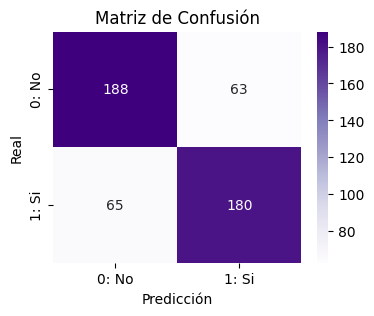

In [23]:
logistica.plot_matriz_confusion("logistic_regression",invertir=False,labels=True,label0="No",label1="Si")

### Sobre la Matriz
- 188 Verdaderos Negativos
- 63 Falsos Positivos (Al final no se van)
- 65 Falsos Negativos (Al final si se van)
- 180 Verdaderos Positivos 


### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [54]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_logistica = logistica.calcular_metricas(modelo_nombre =  "logistic_regression").T
df_logistica["modelo"] = "logistic_regression"
df_logistica

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.785066,0.785275,0.785066,0.785013,0.570090,0.855211,logistic_regression
test,0.741935,0.741926,0.741935,0.741919,0.483745,0.811090,logistic_regression


### Curva ROC

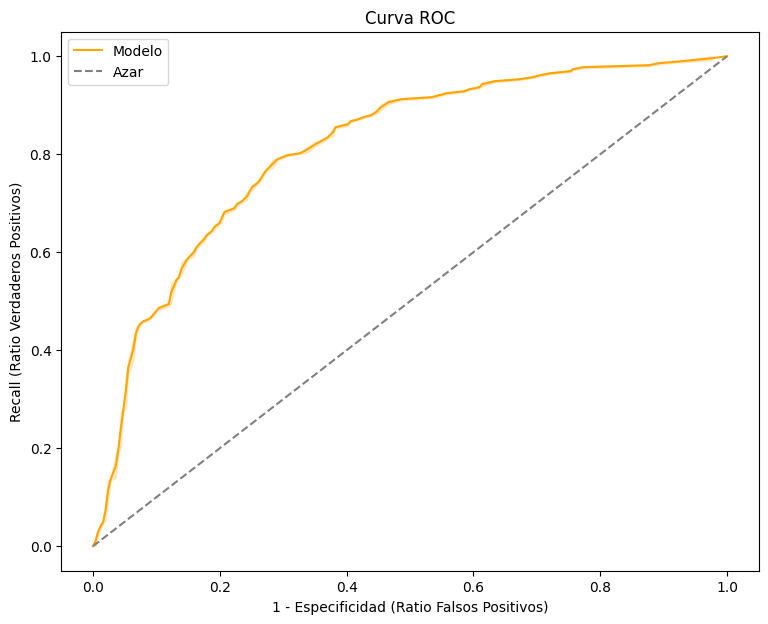

In [25]:
logistica.plot_curva_ROC()

### Importancia

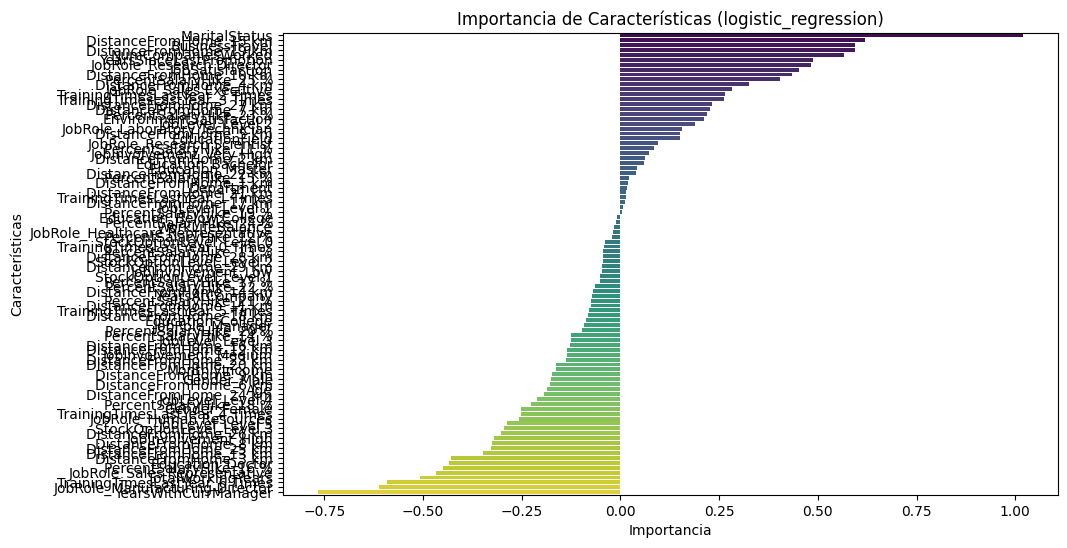

In [26]:
# Mostramos la importancia de los predictores en el modelo regresión logística
logistica.importancia_predictores(modelo_nombre ='logistic_regression')

### Shap Plots

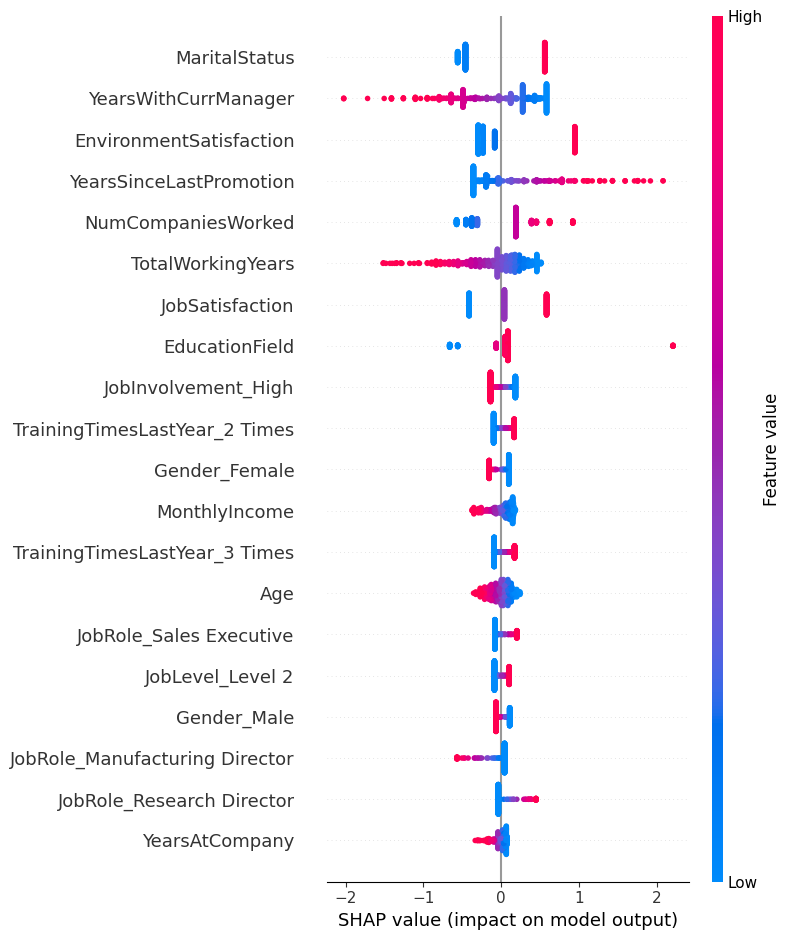

In [27]:
logistica.plot_shap_summary(modelo_nombre ='logistic_regression')

# Decision Tree

In [28]:
# instanciamos la clase de regresión logistica
decision_tree = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
decision_tree.ajustar_modelo("tree",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="decision_tree_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
-------------------------------------------------


### Matriz Confusion

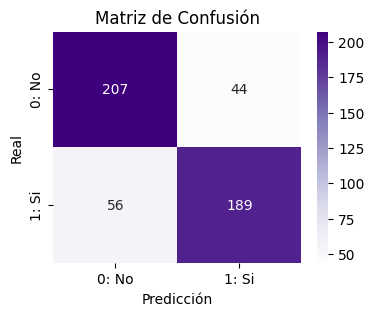

In [29]:
decision_tree.plot_matriz_confusion("tree",invertir=False,labels=True,label0="No",label1="Si")

### Sobre la Matriz
- 207 Verdaderos Negativos
- 44 Falsos Positivos (Al final no se van)
- 56 Falsos Negativos (Al final si se van)
- 189 Verdaderos Positivos 


### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [55]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_tree = decision_tree.calcular_metricas(modelo_nombre =  "tree").T
df_tree["modelo"] = "decision_tree"
df_resultados_final = pd.concat([df_logistica, df_tree], axis = 0)
df_resultados_final

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.785066,0.785275,0.785066,0.785013,0.570090,0.855211,logistic_regression
test,0.741935,0.741926,0.741935,0.741919,0.483745,0.811090,logistic_regression
train,0.959132,0.959190,0.959132,0.959132,0.918266,0.987239,decision_tree
test,0.798387,0.798970,0.798387,0.798210,0.596479,0.790178,decision_tree


### Curva ROC

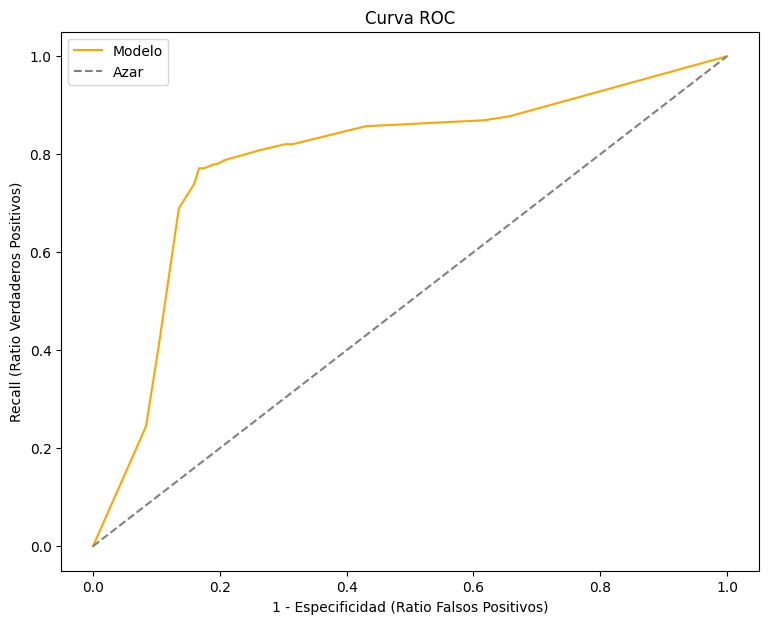

In [31]:
decision_tree.plot_curva_ROC()

### Importancia

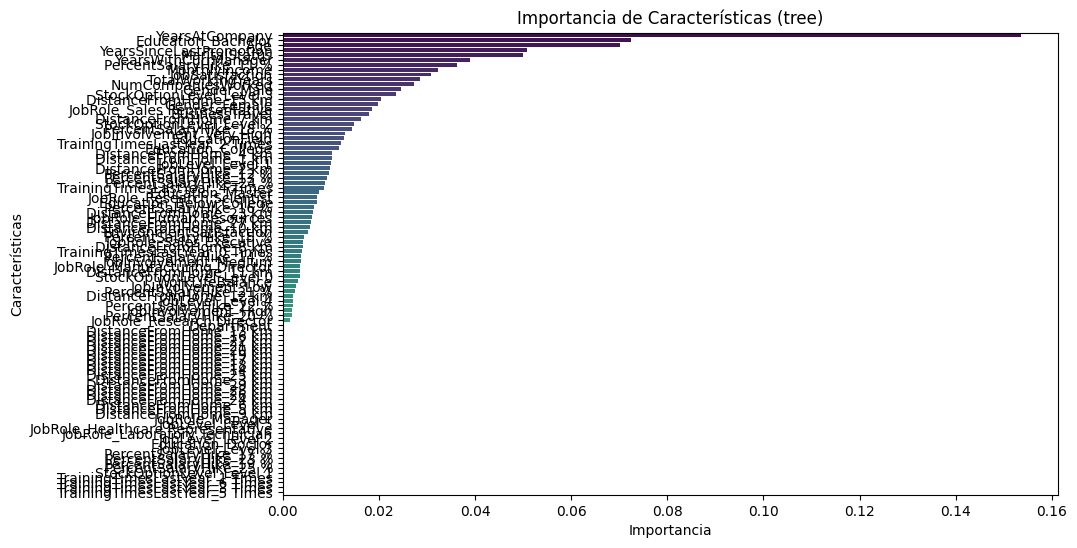

In [32]:
# Mostramos la importancia de los predictores en el modelo regresión logística
decision_tree.importancia_predictores(modelo_nombre ='tree')

### Shap Plots

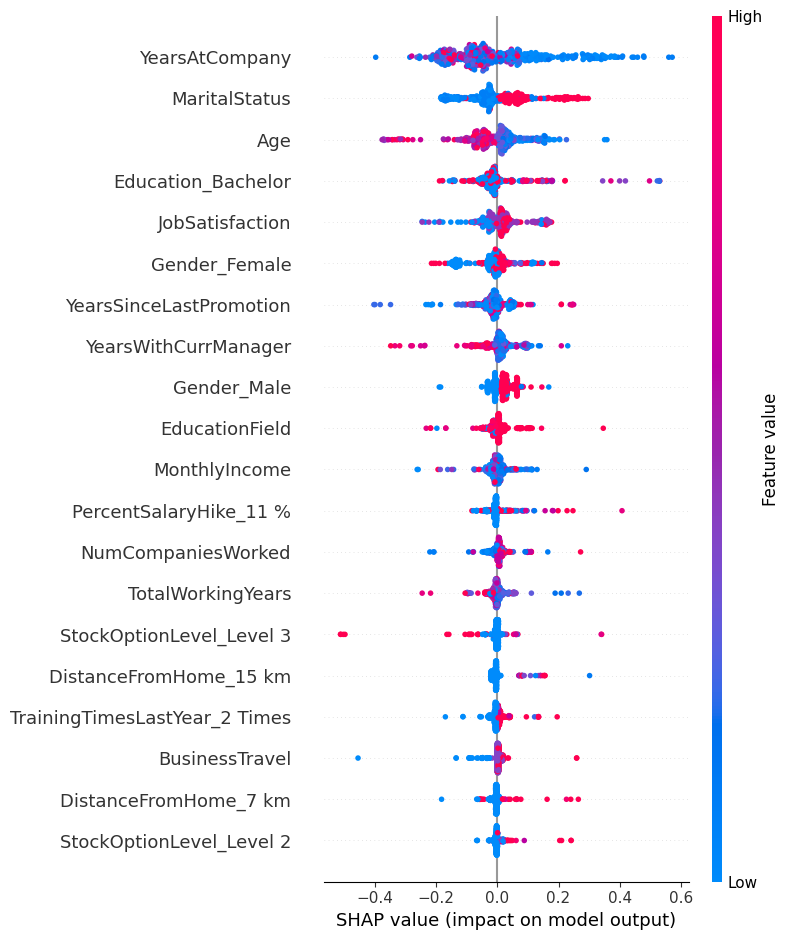

In [33]:
decision_tree.plot_shap_summary(modelo_nombre ='tree')

# Random Forest

In [34]:
# instanciamos la clase de regresión logistica
random_forest = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
random_forest.ajustar_modelo("random_forest",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="random_forest.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=20, max_features='log2', random_state=42)
-------------------------------------------------


### Matriz Confusión

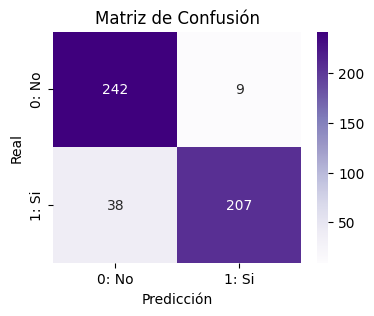

In [35]:
random_forest.plot_matriz_confusion("random_forest",invertir=False,labels=True,label0="No",label1="Si")

### Sobre la Matriz
- 236 Verdaderos Negativos
- 9 Falso Positivo (Al final no se van)
- 38 Falsos Negativos (Al final si se van)
- 38 Verdaderos Positivos 


### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [56]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_random = random_forest.calcular_metricas(modelo_nombre = "random_forest").T
df_random["modelo"] = "random_forest"
df_resultados_final = pd.concat([df_resultados_final, df_random], axis = 0)
df_resultados_final

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.785066,0.785275,0.785066,0.785013,0.570090,0.855211,logistic_regression
test,0.741935,0.741926,0.741935,0.741919,0.483745,0.811090,logistic_regression
train,0.959132,0.959190,0.959132,0.959132,0.918266,0.987239,decision_tree
test,0.798387,0.798970,0.798387,0.798210,0.596479,0.790178,decision_tree
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random_forest
test,0.905242,0.910741,0.905242,0.904849,0.810188,0.961891,random_forest


### Curva ROC

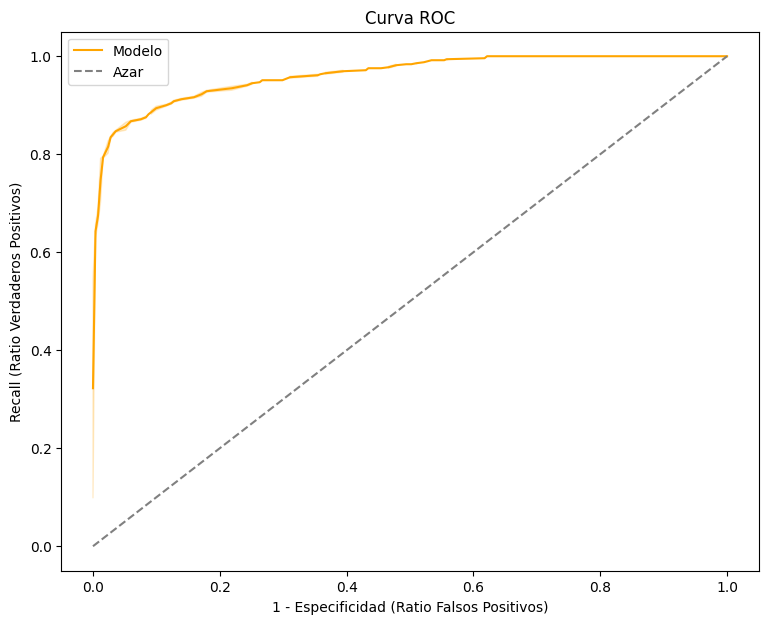

In [37]:
random_forest.plot_curva_ROC()

### Importancia

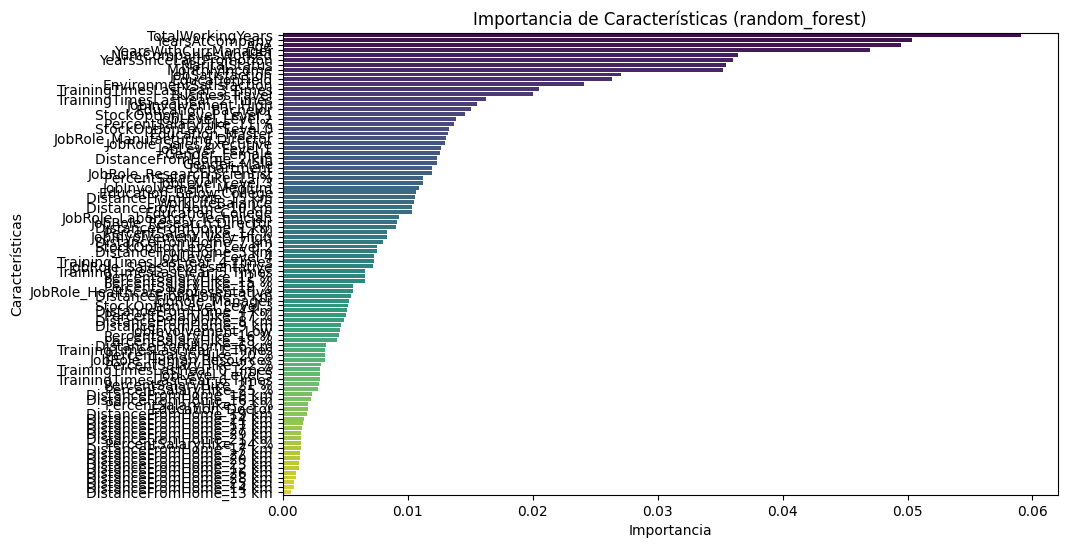

In [ ]:
# Mostramos la importancia de los predictores en el modelo regresión logística
random_forest.importancia_predictores(modelo_nombre ='random_forest')

### Shap Plots

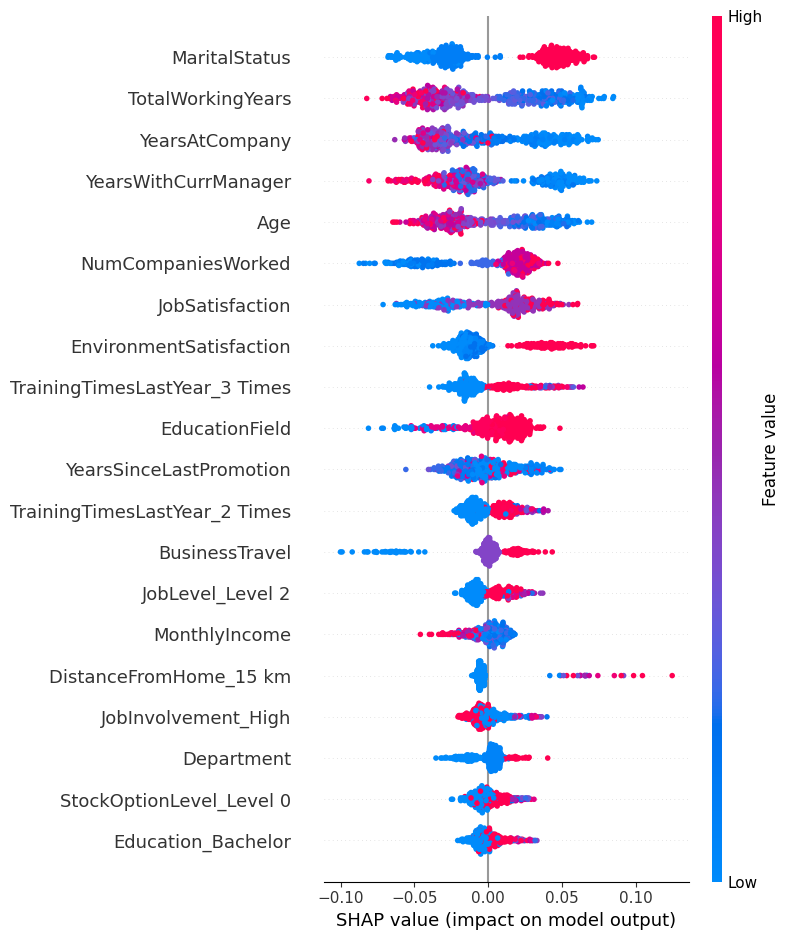

In [39]:
random_forest.plot_shap_summary(modelo_nombre ='random_forest')

# Gradient Boosting

In [40]:
# instanciamos la clase de regresión logistica
gradient_boosting = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
gradient_boosting.ajustar_modelo("gradient_boosting",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="gradient_boosting_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(max_depth=4, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200,
                           random_state=42, subsample=0.8)
-------------------------------------------------


### Matriz Confusion

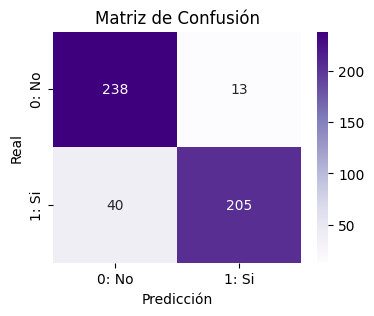

In [41]:
gradient_boosting.plot_matriz_confusion("gradient_boosting",invertir=False,labels=True,label0="No",label1="Si")

### Sobre la Matriz
- 238 Verdaderos Negativos
-  13 Falsos positivos (Al final no se van)
- 40 Falsos Negativos (Al final si se van)
- 205 Verdaderos Positivos 


### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [57]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_gradient = gradient_boosting.calcular_metricas(modelo_nombre = "gradient_boosting").T
df_gradient["modelo"] = "gradient_boosting"
df_resultados_final = pd.concat([df_resultados_final, df_gradient], axis = 0)
df_resultados_final

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.785066,0.785275,0.785066,0.785013,0.570090,0.855211,logistic_regression
test,0.741935,0.741926,0.741935,0.741919,0.483745,0.811090,logistic_regression
train,0.959132,0.959190,0.959132,0.959132,0.918266,0.987239,decision_tree
test,0.798387,0.798970,0.798387,0.798210,0.596479,0.790178,decision_tree
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random_forest
test,0.905242,0.910741,0.905242,0.904849,0.810188,0.961891,random_forest
train,0.992936,0.993035,0.992936,0.992936,0.985873,0.999941,gradient_boosting
test,0.893145,0.897731,0.893145,0.892756,0.785977,0.940011,gradient_boosting


### Curva ROC

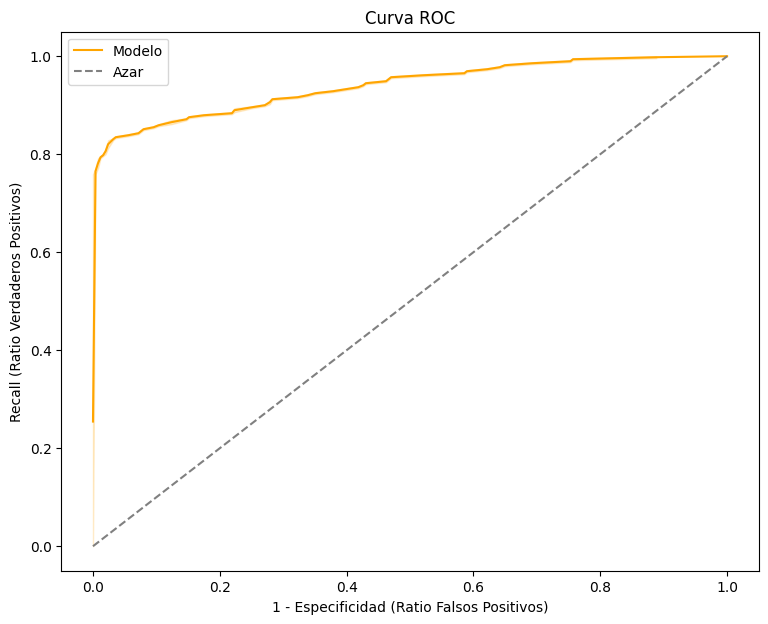

In [43]:
gradient_boosting.plot_curva_ROC()

### Importancia

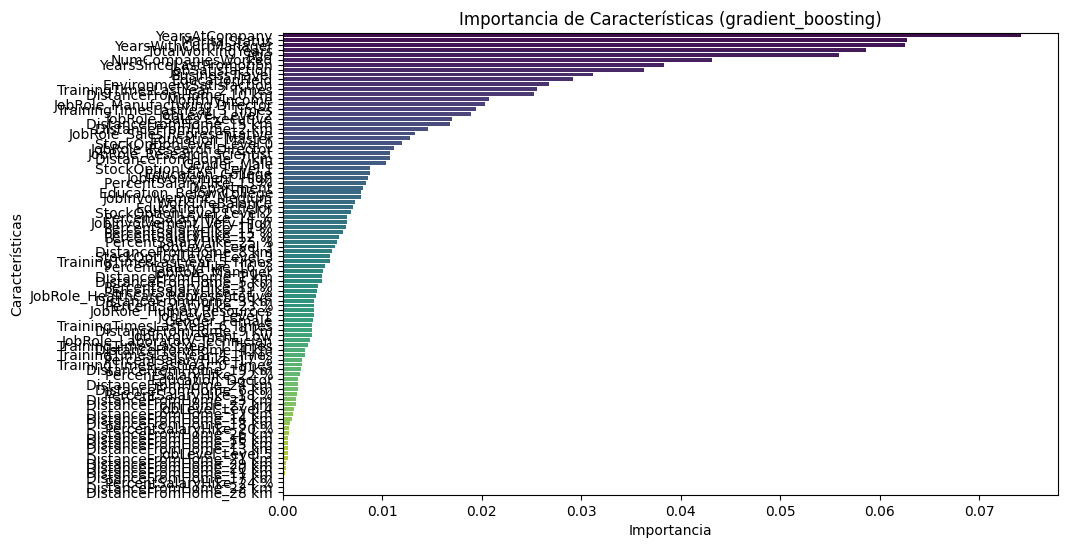

In [44]:
# Mostramos la importancia de los predictores en el modelo regresión logística
gradient_boosting.importancia_predictores(modelo_nombre ='gradient_boosting')

### Shap Plots

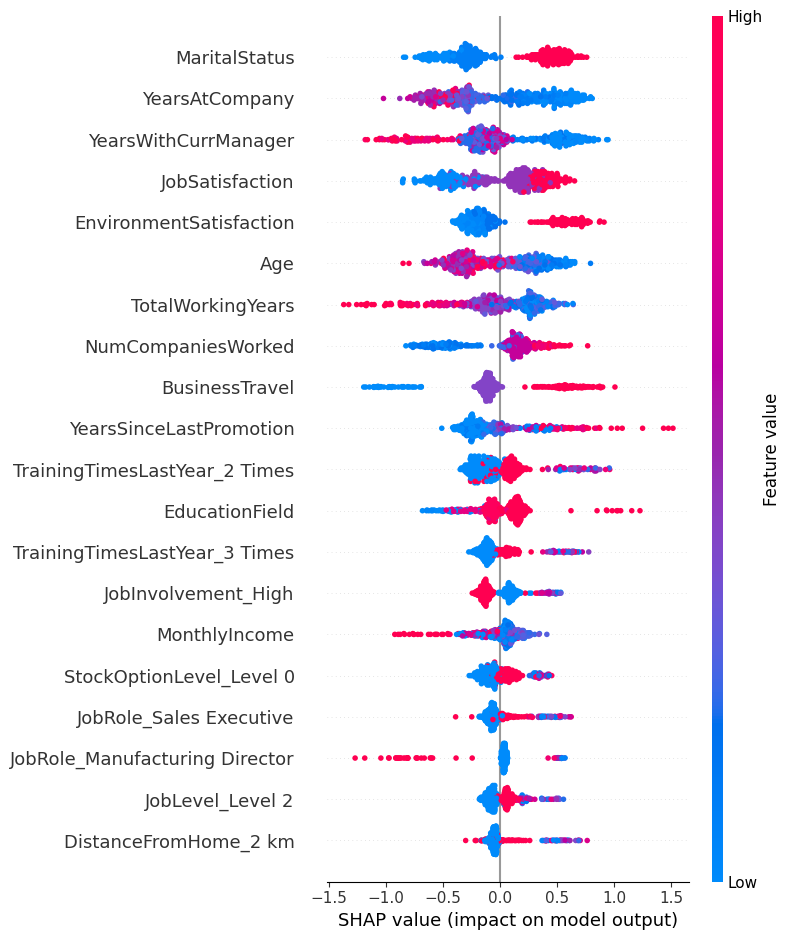

In [45]:
gradient_boosting.plot_shap_summary(modelo_nombre ='gradient_boosting')

# XGBooster

In [46]:
# instanciamos la clase de regresión logistica
xgbooster = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
xgbooster.ajustar_modelo("xgboost",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="XGBooster.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------


### Matriz Confusion

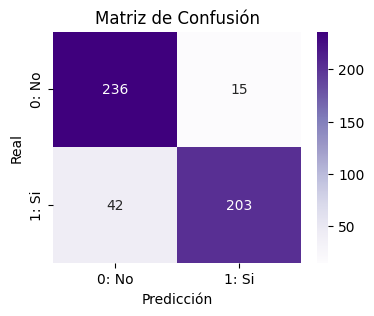

In [47]:
xgbooster.plot_matriz_confusion("xgboost",invertir=False,labels=True,label0="No",label1="Si")

### Sobre la Matriz
- 230 Verdaderos Negativos
-  7 Falso Positivos (Al final no se van)
- 49 Falsos Negativos (Al final si se van)
- 13 Verdaderos Positivos 


### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [58]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_xgboost = xgbooster.calcular_metricas(modelo_nombre = "xgboost").T
df_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_final, df_xgboost], axis = 0)
df_resultados_final

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.785066,0.785275,0.785066,0.785013,0.570090,0.855211,logistic_regression
test,0.741935,0.741926,0.741935,0.741919,0.483745,0.811090,logistic_regression
train,0.959132,0.959190,0.959132,0.959132,0.918266,0.987239,decision_tree
test,0.798387,0.798970,0.798387,0.798210,0.596479,0.790178,decision_tree
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random_forest
test,0.905242,0.910741,0.905242,0.904849,0.810188,0.961891,random_forest
train,0.992936,0.993035,0.992936,0.992936,0.985873,0.999941,gradient_boosting
test,0.893145,0.897731,0.893145,0.892756,0.785977,0.940011,gradient_boosting
train,0.996973,0.996991,0.996973,0.996973,0.993946,0.999991,xgboost
test,0.885081,0.889559,0.885081,0.884663,0.769824,0.934564,xgboost


### Curva ROC

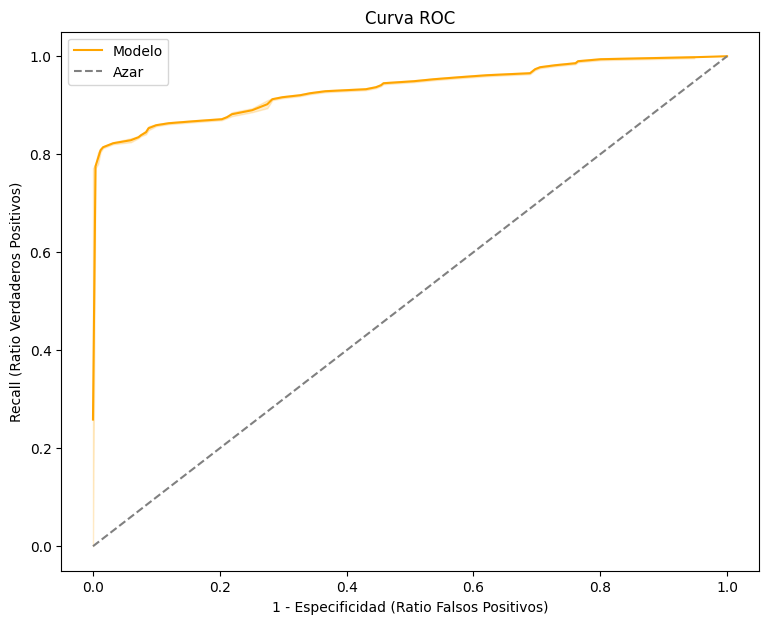

In [49]:
xgbooster.plot_curva_ROC()

### Importancia

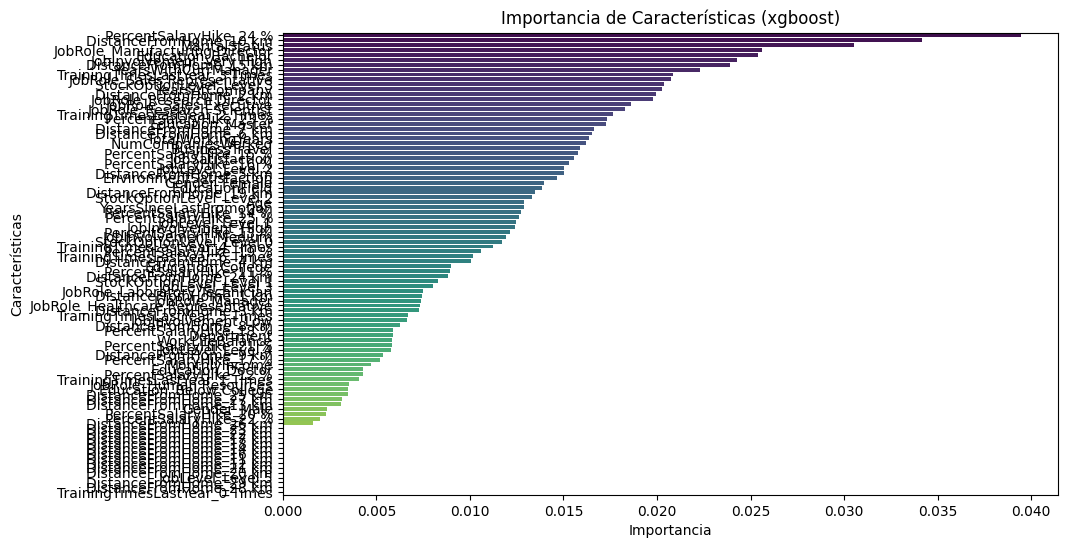

In [61]:
# Mostramos la importancia de los predictores en el modelo regresión logística
xgbooster.importancia_predictores(modelo_nombre ='xgboost')

### Shap Plots

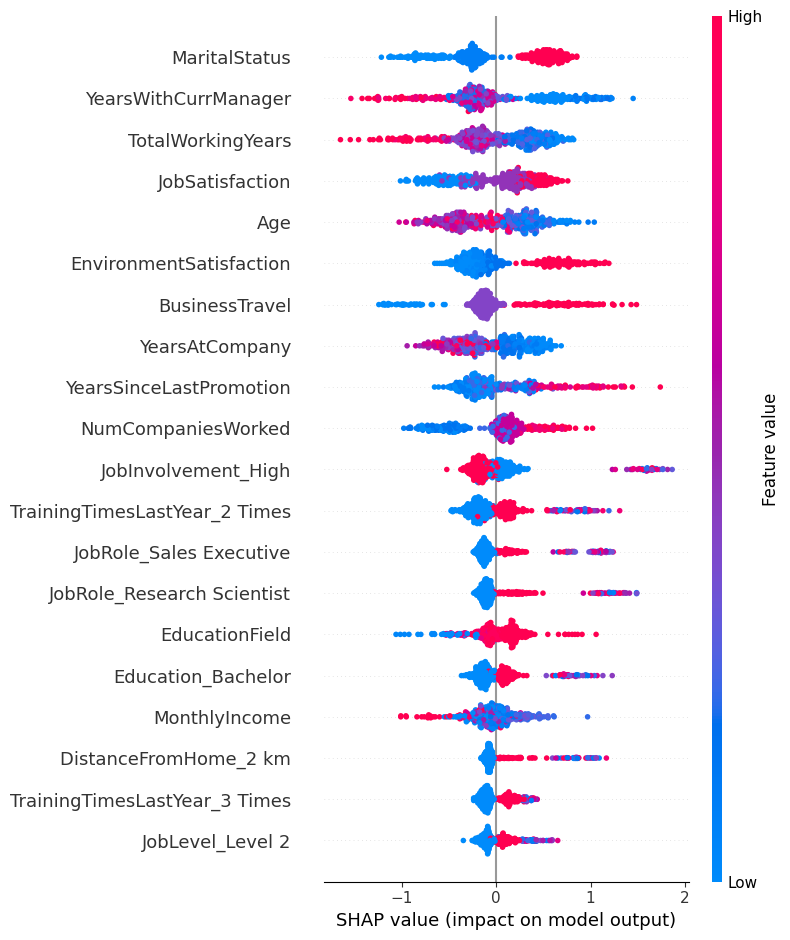

In [51]:
xgbooster.plot_shap_summary(modelo_nombre ='xgboost')

# Comparación de todos

In [52]:
df_colores = df_resultados_final.copy()

In [59]:
df_resultados_final.reset_index(inplace=True)
df_resultados_final = df_resultados_final.rename(columns = {"index":"tipo"})
df_resultados_final = df_resultados_final.style.apply(sal.color_filas_por_modelo,axis=1)
df_resultados_final

,tipo,accuracy,precision,recall,f1,kappa,auc,modelo
0,train,0.785066,0.785275,0.785066,0.785013,0.570090,0.855211,logistic_regression
1,test,0.741935,0.741926,0.741935,0.741919,0.483745,0.811090,logistic_regression
2,train,0.959132,0.959190,0.959132,0.959132,0.918266,0.987239,decision_tree
3,test,0.798387,0.798970,0.798387,0.798210,0.596479,0.790178,decision_tree
4,train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random_forest
5,test,0.905242,0.910741,0.905242,0.904849,0.810188,0.961891,random_forest
6,train,0.992936,0.993035,0.992936,0.992936,0.985873,0.999941,gradient_boosting
7,test,0.893145,0.897731,0.893145,0.892756,0.785977,0.940011,gradient_boosting
8,train,0.996973,0.996991,0.996973,0.996973,0.993946,0.999991,xgboost
9,test,0.885081,0.889559,0.885081,0.884663,0.769824,0.934564,xgboost


# Conclusiones
- Sigue existiendo overfitting
- Hemos conseguido muy buenos resultados
